In [13]:
#import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt
#import plotly as px

# Read in shapefile
# Downloaded from https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip

shape_data = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip")

shape_data.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."


In [14]:
# Filter to only counties in Illinois using StateFP column = 17 
shape_data = shape_data.loc[(shape_data['STATEFP'] == "17")]

shape_data.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
22,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719..."
57,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739..."


In [24]:
# Read in BEP company address physical geocoded csv file
illinois_data = pd.read_csv("../IL_CEI/can-summer-2023/data/clean/bep_company_addresses_physical_geocoded.csv")
illinois_data.head()

,Company Name,Latitude,Longitude,Street,City,County,State,Confidence,Original Address
0,#1 Professional Cleaning Services,41.848017,-87.891201,2205 Mayfair Ave,Westchester,Cook County,IL,High,"2205 Mayfair, Westchester, IL"
1,"#9 Design, LLC",41.890007,-87.992682,524 W Saint Charles Rd,Villa Park,DuPage County,IL,High,"524 West Saint Charles Road, Villa Park, IL"
2,'Bouche' Enterprises LLC,41.943783,-87.812819,3511 N Osceola Ave,Chicago,Cook County,IL,High,"3511 North Osceola Avenue, Chicago, IL"
3,'Merica Made Painting & Decorating Corp.,41.779011,-87.771186,6221 S Austin Ave,Chicago,Cook County,IL,High,"6221 S Austin Ave, Chicago, IL"
4,*VDR Development Group,41.931275,-88.083132,168 N Brandon Dr,Glendale Heights,DuPage County,IL,High,"168 N Brandon Drive, Glendale Heights, IL"


In [25]:
# Filter to only states in Illinois and Group by County name to get total number of BEPs by County 
illinois_data = illinois_data.loc[(illinois_data['State'] == "IL")]
illinois_groupby = illinois_data.groupby('County').count()[['Original Address']].reset_index()
illinois_groupby.tail()

,County,Original Address
76,Whiteside County,2
77,Will County,197
78,Williamson County,2
79,Winnebago County,32
80,Woodford County,2


In [26]:
# Split County Column for an easy merge with shape_data dataframe
illinois_groupby[["County", "Counties_Split"]] = illinois_groupby['County'].str.split(' County', expand=True).astype(str)
#creates new columns for BP Numerator', 'BP Denominator and respectively splits Blood Pressure column data between them



#bep_data_df.head(30)
#il_county.groupby('var').count()[['single_var_need']].reset_index()
illinois_groupby

,County,Original Address,Counties_Split
0,Adams,7,
1,Boone,6,
2,Brown,1,
3,Bureau,1,
4,Carroll,1,
...,...,...,...
76,Whiteside,2,
77,Will,197,
78,Williamson,2,
79,Winnebago,32,


In [27]:
#sample = sample.rename(columns = {0: 'Counties'})
#sample


In [28]:
#merge ex and real_data
# illinois_groupby_pro = pd.merge(illinois_groupby, sample, left_index = True, right_index =True)
#illinois_groupby_pro['County'].unique()
# illinois_groupby_pro['County'].count()
#illinois_groupby_pro

In [29]:
# Rename the Column "NAME" to "County"
shape_data = shape_data.rename(columns = {'NAME': 'County'})

In [30]:
# Merge illinois_groupby dataframe with shape_data dataframe
shape_data_full = shape_data.merge(illinois_groupby, on="County", how="outer")
shape_data_full

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,Original Address,Counties_Split
0,17,101,00424252,0500000US17101,17101,Lawrence,06,9.639369e+08,5077783.0,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",NaN,NaN
1,17,093,00424248,0500000US17093,17093,Kendall,06,8.294680e+08,5136619.0,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",11.0,
2,17,139,01784885,0500000US17139,17139,Moultrie,06,8.701238e+08,22102741.0,"POLYGON ((-88.81271 39.74049, -88.75784 39.739...",NaN,NaN
3,17,049,00424226,0500000US17049,17049,Effingham,06,1.239970e+09,3183217.0,"POLYGON ((-88.80532 39.21626, -88.47091 39.215...",3.0,
4,17,103,00424253,0500000US17103,17103,Lee,06,1.877336e+09,10634483.0,"POLYGON ((-89.63147 41.75813, -89.63026 41.843...",1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
98,17,147,00424275,0500000US17147,17147,Piatt,06,1.137400e+09,755574.0,"POLYGON ((-88.74516 40.05519, -88.74534 40.098...",2.0,
99,17,099,00422247,0500000US17099,17099,LaSalle,06,2.940116e+09,33701591.0,"POLYGON ((-89.16720 41.62871, -89.04511 41.626...",NaN,NaN
100,17,181,01785113,0500000US17181,17181,Union,06,1.070856e+09,22502069.0,"POLYGON ((-89.52173 37.56621, -89.52157 37.570...",2.0,
101,17,173,01785051,0500000US17173,17173,Shelby,06,1.964543e+09,24746071.0,"POLYGON ((-89.13981 39.34889, -89.02545 39.346...",1.0,


In [34]:
shape_data_full['Original Address'] = shape_data_full['Original Address'].fillna(0)
shape_data_full

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,Original Address,Counties_Split
0,17,101,00424252,0500000US17101,17101,Lawrence,06,9.639369e+08,5077783.0,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",0.0,NaN
1,17,093,00424248,0500000US17093,17093,Kendall,06,8.294680e+08,5136619.0,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",11.0,
2,17,139,01784885,0500000US17139,17139,Moultrie,06,8.701238e+08,22102741.0,"POLYGON ((-88.81271 39.74049, -88.75784 39.739...",0.0,NaN
3,17,049,00424226,0500000US17049,17049,Effingham,06,1.239970e+09,3183217.0,"POLYGON ((-88.80532 39.21626, -88.47091 39.215...",3.0,
4,17,103,00424253,0500000US17103,17103,Lee,06,1.877336e+09,10634483.0,"POLYGON ((-89.63147 41.75813, -89.63026 41.843...",1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
98,17,147,00424275,0500000US17147,17147,Piatt,06,1.137400e+09,755574.0,"POLYGON ((-88.74516 40.05519, -88.74534 40.098...",2.0,
99,17,099,00422247,0500000US17099,17099,LaSalle,06,2.940116e+09,33701591.0,"POLYGON ((-89.16720 41.62871, -89.04511 41.626...",0.0,NaN
100,17,181,01785113,0500000US17181,17181,Union,06,1.070856e+09,22502069.0,"POLYGON ((-89.52173 37.56621, -89.52157 37.570...",2.0,
101,17,173,01785051,0500000US17173,17173,Shelby,06,1.964543e+09,24746071.0,"POLYGON ((-89.13981 39.34889, -89.02545 39.346...",1.0,


<Axes: >

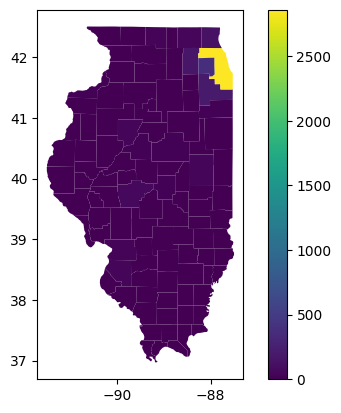

In [35]:
shape_data_full.plot(column='Original Address',legend=True)

<Axes: >

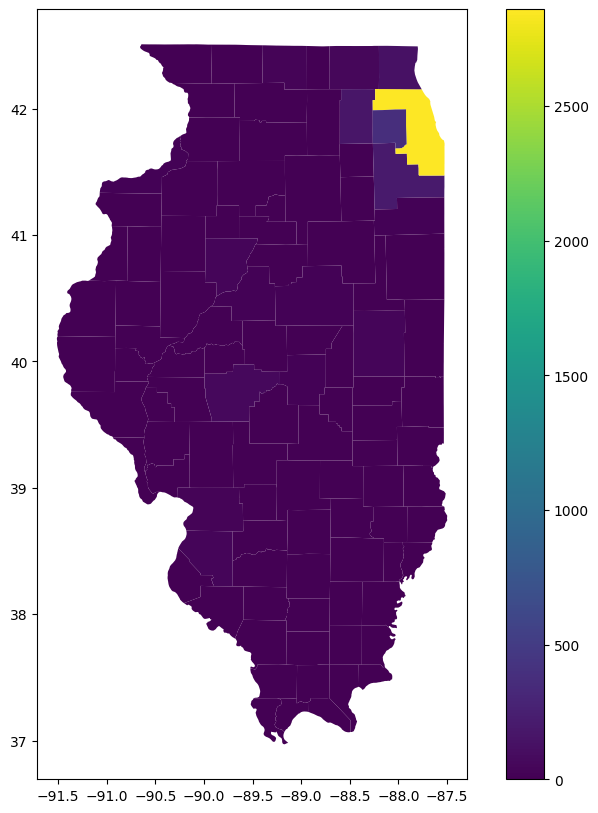

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
shape_data_full.plot(ax=ax,column='Original Address',legend=True)

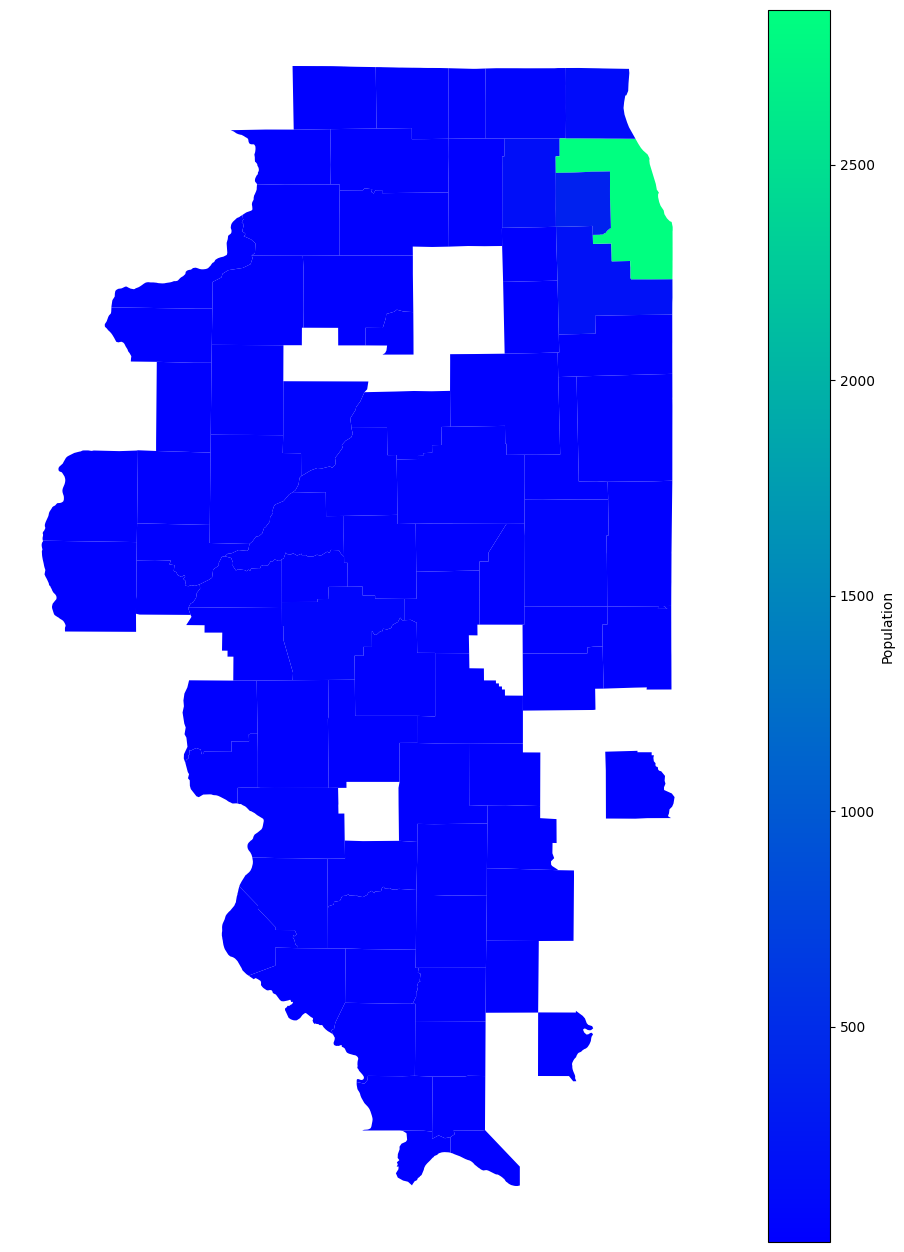

In [65]:
# to remove the box
ax = shape_data_full.plot(column='Original Address',legend=True,figsize=(16,16), legend_kwds={'label': 'Population'}, cmap='#')
ax.set_axis_off()

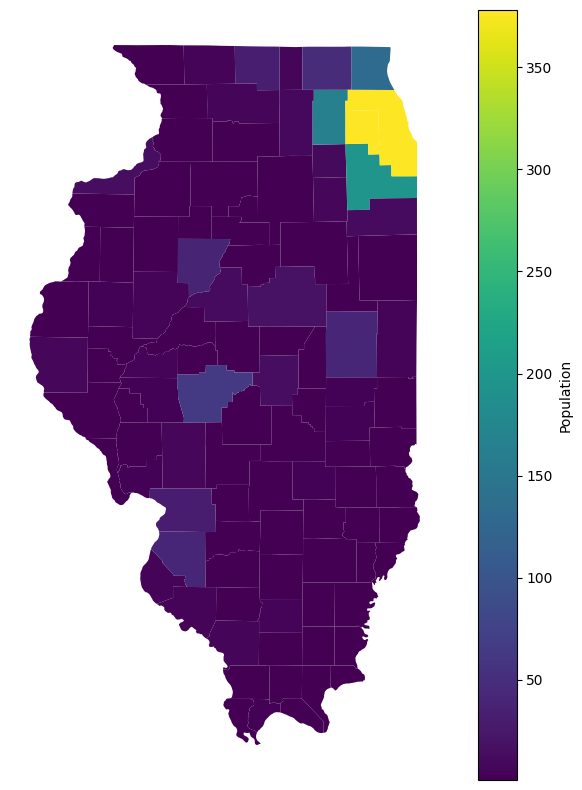

In [37]:
#then plot
fig, ax = plt.subplots(figsize=(10, 10))
shape_data_full.plot(ax=ax, column='Original Address',legend=True,figsize=(10,10), vmin = 1, vmax = 378, legend_kwds={'label': 'Population'})
ax.set_axis_off()

In [69]:
shape_data_full["Original Address"].max()

2859

In [70]:
shape_data_full["Original Address"].min()

1

In [71]:
shape_data_full["Original Address"].describe()

count      80.00000
mean       53.23750
std       321.92873
min         1.00000
25%         1.00000
50%         2.00000
75%         7.00000
max      2859.00000
Name: Original Address, dtype: float64

In [72]:
shape_data_full["Original Address"].nlargest()

40    2859
63     378
28     197
25     163
59     131
Name: Original Address, dtype: int64

In [ ]:
#  How do the total number of contract types vary by geography (county)-Eke
